In [1]:
!pip install opencv-contrib-python

/usr/local/anaconda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/local/anaconda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [80]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import os

In [3]:
img  = cv.imread('/mnt/Exercises/Tomato Analyzer/Image 25 - Copy.tif')

In [4]:
def imgshow(img):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

def grayshow(img):
    plt.imshow(img,cmap='gray')
    plt.show()

def rescaleFrame(frame,scale):
    width = int(frame.shape[1]*scale)
    height = int(frame.shape[0]*scale)
    dimensions = (width,height)
    return cv.resize(frame,dimensions, interpolation=cv.INTER_AREA)

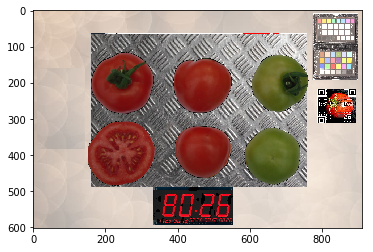

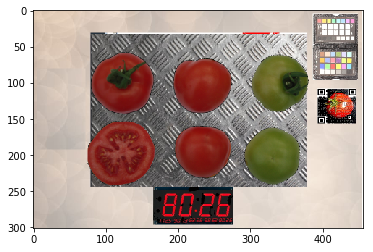

(602, 912, 3)


In [5]:
imgshow(img)
imgshow(rescaleFrame(img,0.5))
print(img.shape)

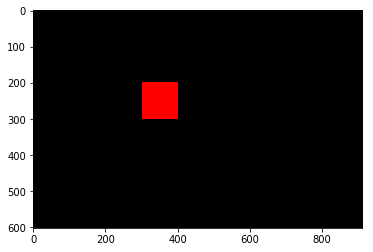

In [6]:
blank =  np.zeros((602,912,3),dtype='uint8')
blank[200:300,300:400] = 0,0,255
imgshow(blank)

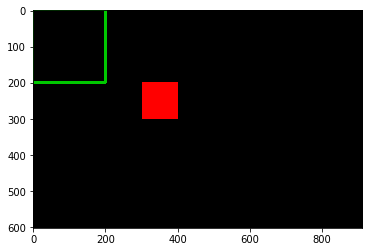

In [7]:
cv.rectangle(blank,(0,0),(200,200),(0,200,0),thickness=6)
imgshow(blank)

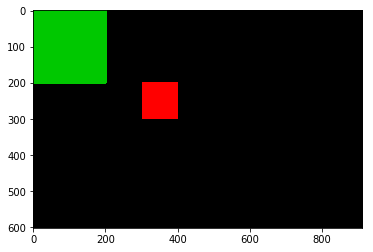

In [8]:
cv.rectangle(blank,(0,0),(200,200),(0,200,0),thickness=cv.FILLED)
imgshow(blank)

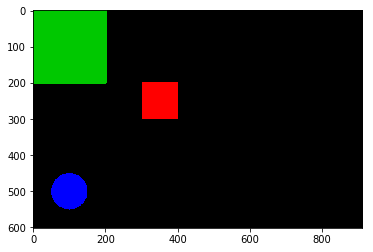

In [9]:
cv.circle(blank,(100,500),50,(255,0,0),thickness=-1)
imgshow(blank)

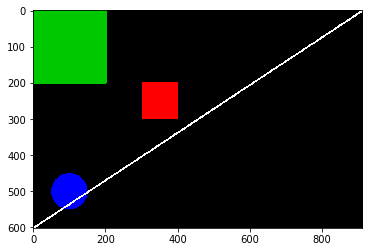

In [10]:
cv.line(blank,(0,602),(912,0),(255,255,255),thickness=4)
imgshow(blank)

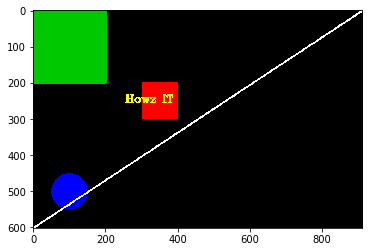

In [11]:
cv.putText(blank,'Howz IT',(255,255),cv.FONT_HERSHEY_COMPLEX,1.0,(0,255,255),thickness=3)
imgshow(blank)

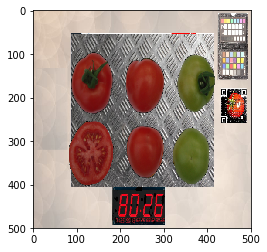

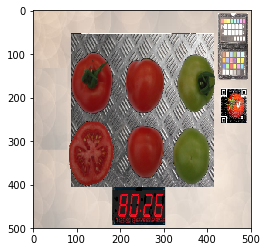

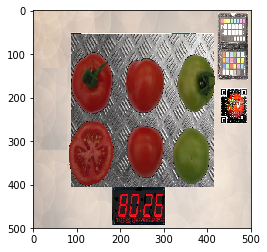

In [12]:
resized = cv.resize(img, (500,500))
resized_area = cv.resize(img, (500,500),interpolation=cv.INTER_AREA)
resized_cubic = cv.resize(img, (500,500),interpolation=cv.INTER_CUBIC)
imgshow(resized)
imgshow(resized_area)
imgshow(resized_cubic)

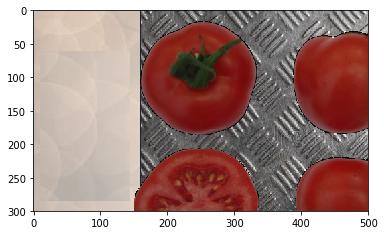

In [13]:
cropped = img[100:400,0:500]
imgshow(cropped)

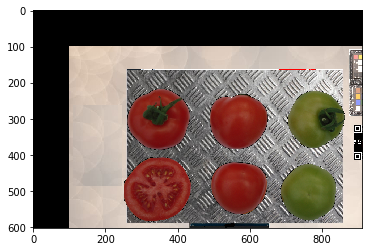

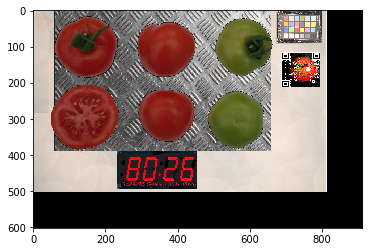

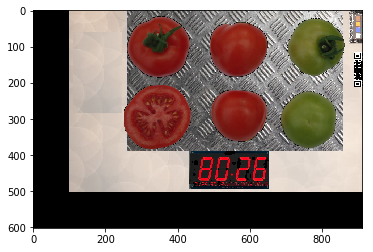

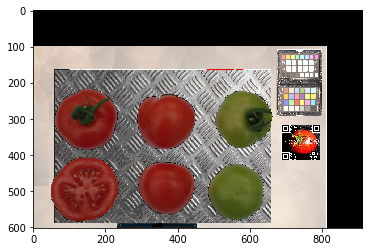

In [14]:
def translate(img,x,y):
    transMat = np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1],img.shape[0])
    return cv.warpAffine(img,transMat,dimensions)

# (-ve)x -- Left
# (-ve)y -- Left
# (+ve)x -- Right
# (+ve)y -- Down

imgshow(translate(img,100,100))
imgshow(translate(img,-100,-100))
imgshow(translate(img,100,-100))
imgshow(translate(img,-100,100))

Rotated Image


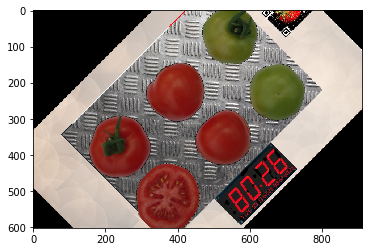

In [15]:
def rotate(img,angle,rotPoint=None):
    (height,width)= img.shape[:2]
    if rotPoint is None:
        rotPoint = (width//2,height//2)
        
    rotMat = cv.getRotationMatrix2D(rotPoint,angle,1.0)
    dimensions=(width,height)
    return cv.warpAffine(img,rotMat,dimensions)
print("Rotated Image")
imgshow(rotate(img,45))

Oriinal Image


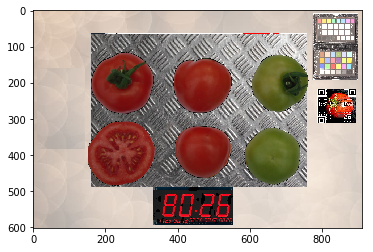

Right Flip Image


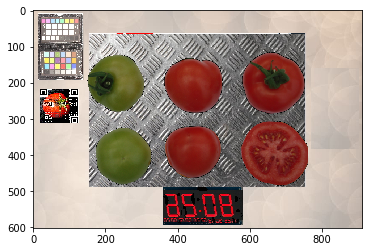

Bottom Flip Image


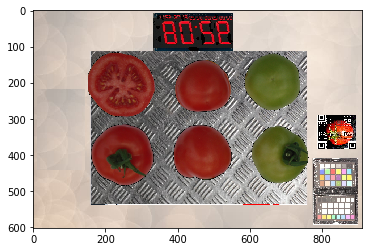

Right and Bottom Flip Image


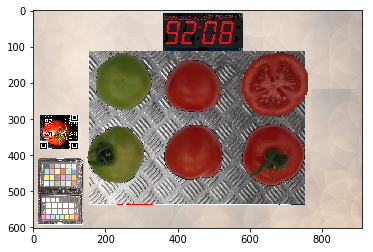

In [16]:
print("Oriinal Image")
imgshow(img)
print("Right Flip Image")
imgshow(cv.flip(img,1))
print("Bottom Flip Image")
imgshow(cv.flip(img,0))
print("Right and Bottom Flip Image")
imgshow(cv.flip(img,-1))

Image


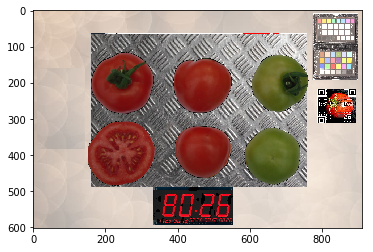

Gray Image


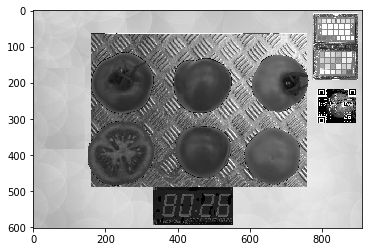

Blur Image


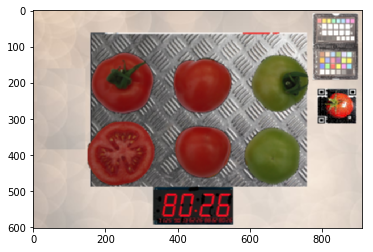

Canny Image


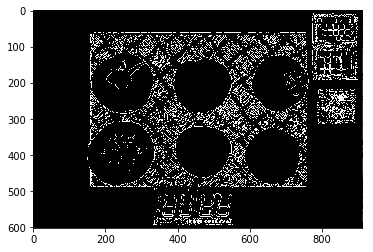

Canny Blur Image


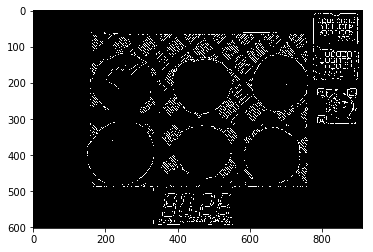

In [17]:
print("Image")
imgshow(img)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
print("Gray Image")
imgshow(gray)
blur=cv.GaussianBlur(img,(5,5),cv.BORDER_DEFAULT)
print("Blur Image")
imgshow(blur)
print("Canny Image")
imgshow(cv.Canny(img,125,175))
print("Canny Blur Image")
imgshow(cv.Canny(blur,125,175))

Dialted Image


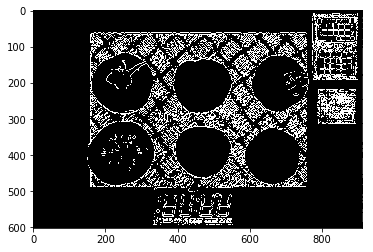

Eroded Image


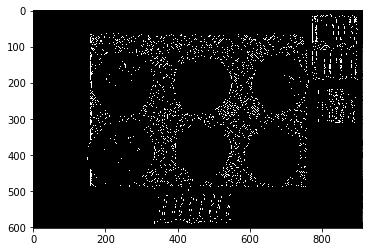

In [19]:
cany =cv.Canny(img,125,175)
dialted = cv.dilate(cany,(3,3),iterations=1)
print("Dialted Image")
imgshow(dialted)
eroded = cv.erode(cany,(3,3),iterations=1)
print("Eroded Image")
imgshow(eroded)

# maybe use number of particles ecpected and circulaty features in for loop to find a threshold.



In [20]:
blur_gray = cv.GaussianBlur(gray,(5,5),cv.BORDER_DEFAULT)
canny_gray = cv.Canny(blur_gray,125,175)
contours,hierarches = cv.findContours(canny_gray,cv.RETR_LIST,cv.CHAIN_APPROX_NONE)

In [21]:
print(len(contours))

608


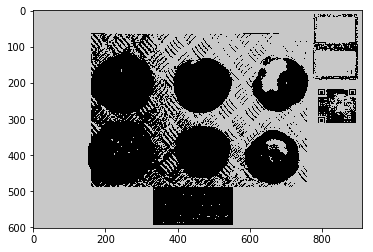

In [22]:
ret,thresh = cv.threshold(gray,100,200,cv.THRESH_BINARY)
imgshow(thresh)

BGR Image


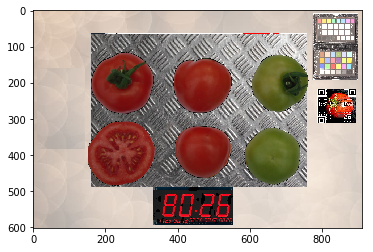

RGB Image


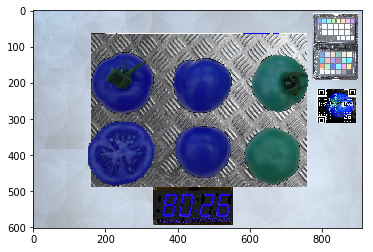

GRAY Image


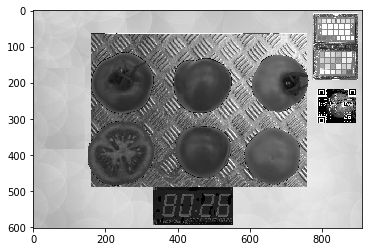

HSV Image


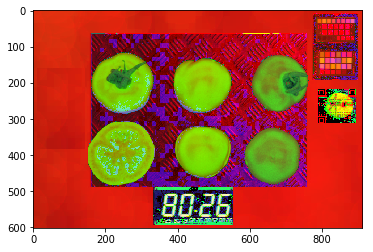

L*a*b Image


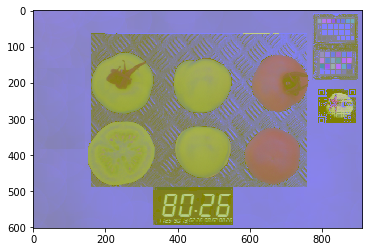

In [23]:
print("BGR Image")
imgshow(img)
rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
print("RGB Image")
imgshow(rgb)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
print("GRAY Image")
imgshow(gray)
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
print("HSV Image")
imgshow(hsv)
lav = cv.cvtColor(img,cv.COLOR_BGR2LAB)
print("L*a*b Image")
imgshow(lav)

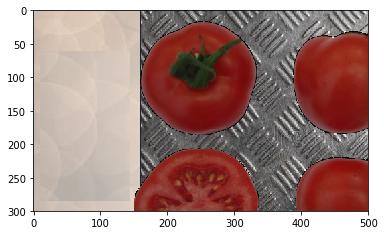

In [24]:
cropped = img[100:400,0:500]
imgshow(cropped)

In [72]:
cv.dial

## Face Detection

In [26]:
!git clone https://github.com/jasmcaus/opencv-course
!git clone https://github.com/jasmcaus/caer
!pip install caer

Cloning into 'opencv-course'...
remote: Enumerating objects: 489, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 489 (delta 18), reused 13 (delta 5), pack-reused 448
Receiving objects: 100% (489/489), 10.55 MiB | 51.43 MiB/s, done.
Resolving deltas: 100% (186/186), done.
Cloning into 'caer'...
remote: Enumerating objects: 27996, done.
remote: Counting objects: 100% (745/745), done.
remote: Compressing objects: 100% (450/450), done.
remote: Total 27996 (delta 437), reused 514 (delta 295), pack-reused 27251
Receiving objects: 100% (27996/27996), 248.54 MiB | 60.91 MiB/s, done.
Resolving deltas: 100% (13639/13639), done.
/usr/local/anaconda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/local/anaconda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDepre

In [24]:
import urllib
import urllib.request

In [37]:
urllib.request.urlretrieve("https://static01.nyt.com/images/2020/11/19/us/artificial-intelligence-fake-people-faces-promo-1605818328743/artificial-intelligence-fake-people-faces-promo-1605818328743-facebookJumbo-v3.jpg","Face-Sample.jpg")


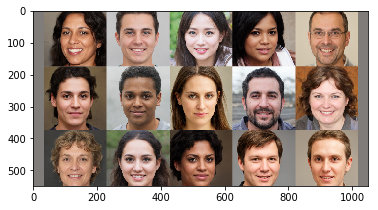

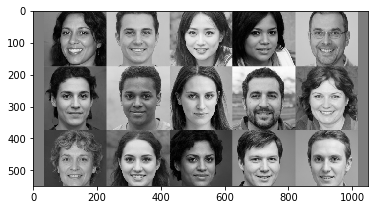

In [76]:
Face_image =  cv.imread('Face-Sample.jpg')
Face_gray = cv.cvtColor(Face_image,cv.COLOR_BGR2GRAY)
imgshow(Face_image)
imgshow(Face_gray)

In [77]:
haar_cascade=cv.CascadeClassifier(cv.data.haarcascades +'haarcascade_frontalface_default.xml')

In [78]:
face_rect = haar_cascade.detectMultiScale(Face_gray,scaleFactor = 1.1,minNeighbors=8)
print(f'Number of faces found = {len(face_rect)}')

Number of faces found = 15


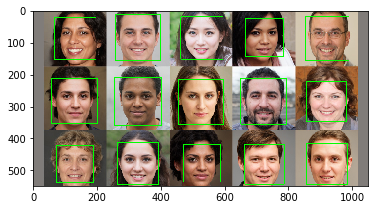

In [79]:
for (x,y,w,h) in face_rect:
    cv.rectangle(Face_image,(x,y),(x+w,y+h),(0,255,0),thickness=2)
imgshow(Face_image)

In [87]:
people = ['Ben Afflek','Elton John','Jerry Seinfield','Madonna','Mindy Kaling']

In [97]:
DIR = '/mnt/Exercises/OpenCV/opencv-course/Resources/Faces/train'
features = []
labels =[]

def create_train():
    for person in people:
        path = os.path.join(DIR,person)
        label=people.index(person)
        
        for img in os.listdir(path):
            img_path =  os.path.join(path,img)
            
            img_array=cv.imread(img_path)
            gray=cv.cvtColor(img_array,cv.COLOR_BGR2GRAY)
            
            faces_rect = haar_cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=4)
            for (x,y,w,h) in faces_rect:
                faces_roi = gray[y:y+h,x:x+w]
                features.append(faces_roi)
                labels.append(label)

In [98]:
create_train()
print(f'Length of the geatures = {len(features)}')
print(f'Length of the geatures = {len(labels)}')

Length of the geatures = 100
Length of the geatures = 100


In [4]:
import cv2 as cv
print(dir (cvface))

NameError: name 'cvface' is not defined

In [2]:
face_recognizer = cv.face.LBPHFaceRecognizer_create()
features = np.array(features,dtype='object')
labels = np.array(labels)
feature_recognizer.train(features,labels)
np.save('features.npy',features)
np.save(labels.npy,labels)

AttributeError: module 'cv2.cv2' has no attribute 'face'

## Deep Computer Vision

In [9]:
!pip install --user canaro

/usr/local/anaconda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/local/anaconda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached canaro-1.1.0-py3-none-any.whl (19 kB)
  Using cached tensorflow-2.6.0-cp37-cp37m-manylinux2010_x86_64.whl (458.3 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached protobuf-3.18.0-cp37-cp37m-manylinu

In [13]:
!pip install --user kaggle

/usr/local/anaconda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/local/anaconda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 58 kB 7.8 MB/s  eta 0:00:01
     |████████████████████████████████| 78 kB 485 kB/s  eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=2175798bfc77f04d3a112fce42ad6e055409424ef3a1acef8f207da8cb43faae
  Stored in directory: /home/ubuntu/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this director

In [15]:
import canaro
import caer


In [18]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/mnt/"

In [19]:
export KAGGLE_USERNAME="karthickjayaraman"
export KAGGLE_KEY="681f4eaa760159edc7415dd476018cfa"

In [22]:
!kaggle datasets list -s demographics

/bin/sh: 1: kaggle: not found


In [27]:
urllib.request.urlretrieve("https://www.kaggle.com/alexattia/the-simpsons-characters-dataset/download")


('/tmp/tmpq6ielu0_', <http.client.HTTPMessage at 0x7f62f05ac7d0>)

In [ ]:
average = cv.blur(img,(7,7))
gauss = cv,GaussianBlur(img,(7,7),0)
median = cv.medianBlur(img,3)
bilateral = cv.bilateralFilter(img,15,15)

In [ ]:
bitwise_and = cv.bitwise_and(rectangle,circle) 
bitwise_or = cv.bitwise_or(rectangle,circle) 
bitwise_xor = cv.bitwise_xor(rectangle,circle) 
bitwise_not = cv.bitwise_not(circle) 

In [ ]:
gray_histv = cv.calcHist([img],[i],None,[256])
threshold,thresh = cv.threshold(gray,150,255,cv.THRESH_BINARY_INV)
Adthresh = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_BINARY_MEAN_C,cv.THRESH_BINARY)

In [ ]:
cv.Laplacian(gray,cv.CV_64F)
sobelx=cv.Sobel(gray,cv.CV_64F,1,0)
sobely=cv.Sobel(gray,cv.CV_64F,0,1)
combined_sobel = cv.bitwise_or(sobelx,sobely)